# Visualising crystal structures with fresnel and matplotlib

This example takes some crystal structures and visualises them with fresnel and matplotlib. 
It requires fresnel to be installed from conda-forge with `conda install fresnel -c conda-forge`.

In [1]:
from matador.utils.viz_utils import fresnel_plot
from matador.utils.optimade_utils import optimade2dict
import requests

In [2]:
crystals = [
    optimade2dict(structure) for structure in 
    requests.get("https://optimade.materialsproject.org/v1/structures?page_limit=6").json()["data"]
]

Rendering scenes: 6it [00:21,  3.64s/it]


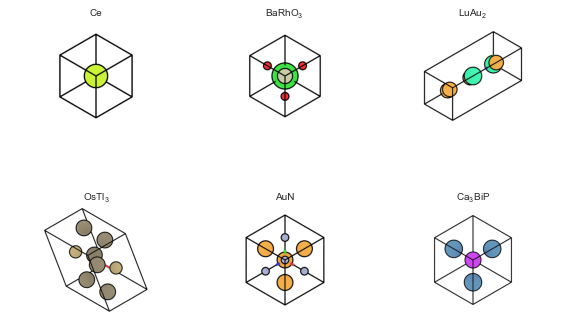

In [3]:
import matplotlib.pyplot as plt
fig, axes, scenes = fresnel_plot(crystals, fig_rows=2, figsize=(8, 8))
plt.tight_layout()

Rendering scenes: 6it [00:34,  5.71s/it]


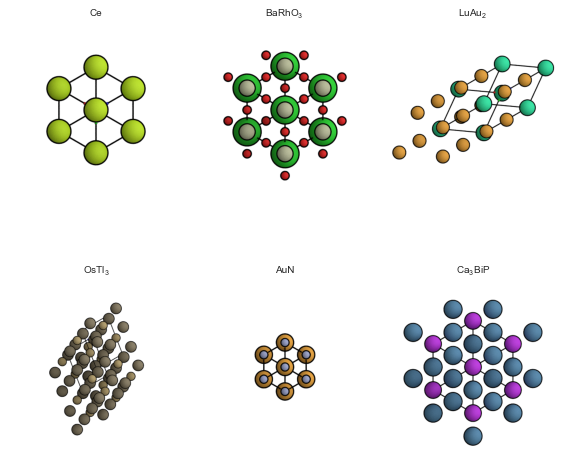

In [7]:
import fresnel
from functools import partial
        
fig, axes, scenes = fresnel_plot(
    crystals,
    renderer=partial(fresnel.pathtrace, w=400, h=400, light_samples=64, samples=64),
    figsize=(8, 8),
    fig_rows=2,
    extension=6*[(2, 2, 2)],
    lights=fresnel.light.rembrandt,
    standardize=False,
)

Optional: install PySide2 to use interactive scene views with fresnel. Useful for finding the desired camera angle for a given structure.

In [8]:
from PySide2 import QtCore
%gui qt
import fresnel.interact
view = fresnel.interact.SceneView(scenes[5])
view.show()
breakpoint()

In [9]:
# Move camera to desired position and observe changes
repr(scenes[5].camera)

'fresnel.camera.Orthographic(position=(10.249999, 10.249999, 10.249999), look_at=(4.365, 4.365, 4.365), up=(-0.4082483, 0.8164966, -0.4082483), height=18.346677780151367)'

In [10]:
from matador.utils.viz_utils import rerender_scenes_to_axes
rerender_scenes_to_axes(scenes, axes)

Rendering scenes: 6it [00:15,  2.50s/it]


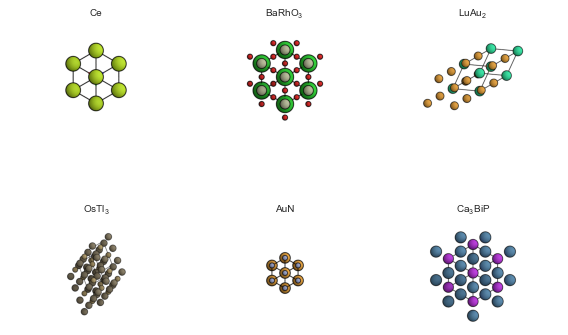

In [11]:
fig